<a href="https://colab.research.google.com/github/castariva18/TK_Bigdata_Binus/blob/main/TK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Share

In [ ]:
import numpy as np
import pandas as pd

data_bike = pd.read_csv("bike_share.csv")
data_bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rentals
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
data_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dteday         731 non-null    object 
 1   season         731 non-null    int64  
 2   yr             731 non-null    int64  
 3   mnth           731 non-null    int64  
 4   holiday        731 non-null    int64  
 5   weekday        731 non-null    int64  
 6   workingday     731 non-null    int64  
 7   weathersit     731 non-null    int64  
 8   temp           731 non-null    float64
 9   atemp          731 non-null    float64
 10  hum            731 non-null    float64
 11  windspeed      731 non-null    float64
 12  casual         731 non-null    int64  
 13  registered     731 non-null    int64  
 14  total_rentals  731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


## Grouping Categorical Columns

In [ ]:
data_bike_cats = ['season', 'yr', 'mnth', 'holiday', 'weekday']

for i in data_bike_cats :
  print('---'*10)
  print(i)
  print(data_bike[i].value_counts())

------------------------------
season
3    188
2    184
1    181
4    178
Name: season, dtype: int64
------------------------------
yr
1    366
0    365
Name: yr, dtype: int64
------------------------------
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: mnth, dtype: int64
------------------------------
holiday
0    710
1     21
Name: holiday, dtype: int64
------------------------------
weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: weekday, dtype: int64


## Data visualization of Categorical Columns

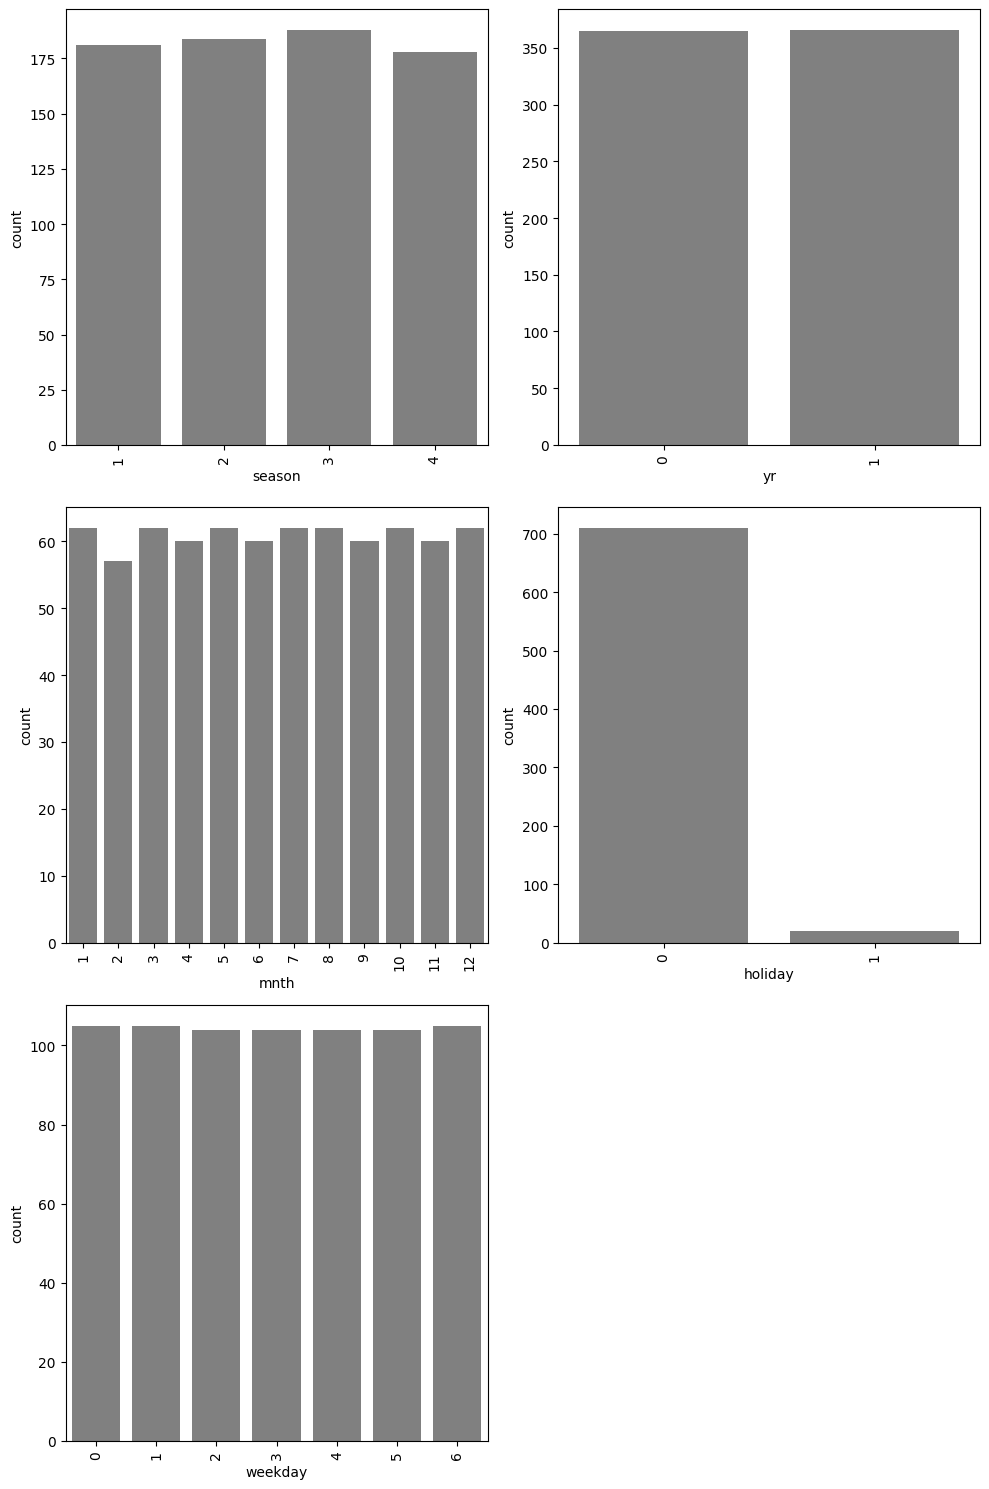

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure

plt.figure(figsize=(10,15))
for i in range(0, len(data_bike_cats)) :
  plt.subplot(3,2, i+1)
  sns.countplot(x=data_bike[data_bike_cats[i]], color='grey')
  plt.xlabel(data_bike_cats[i])
  plt.xticks(rotation=90)
  plt.tight_layout()

## Grouping by Year, Month, Register User, and Total Rentals

In [ ]:
data1_grouped = data_bike.groupby(['yr','mnth'])['registered','total_rentals'].sum()
data1_grouped

<ipython-input-8-7972810ffa5a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data1_grouped = data_bike.groupby(['yr','mnth'])['registered','total_rentals'].sum()


registered  total_rentals
yr mnth                           
0  1          35116          38189
   2          41973          48215
   3          51219          64045
   4          72524          94870
   5         104771         135821
   6         112900         143512
   7         104889         141341
   8         107849         136691
   9         100873         127418
   10         98289         123511
   11         86573         102167
   12         78875          87323
1  1          87775          96744
   2          94416         103137
   3         133257         164875
   4         135768         174224
   5         151630         195865
   6         159536         202830
   7         161902         203607
   8         171306         214503
   9         174795         218573
   10        164303         198841
   11        131655         152664
   12        110468         123713

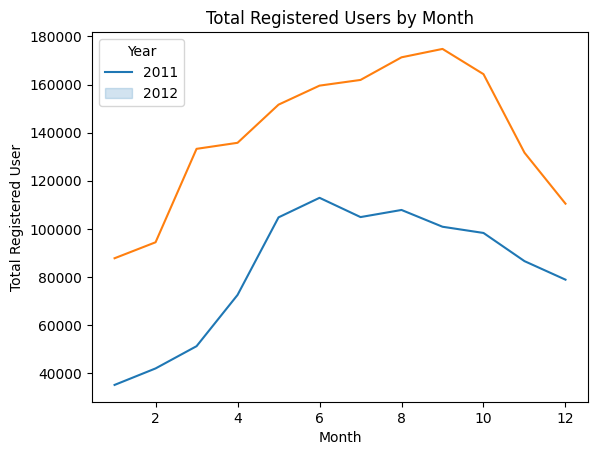

In [ ]:
data_bike_reg = sns.lineplot(x = 'mnth', y = 'registered', data = data1_grouped, hue = 'yr')
data_bike_reg.set(xlabel = 'Month', ylabel = 'Total Registered User', title = 'Total Registered Users by Month')
plt.legend(title = 'Year', loc = 'upper left', labels = ['2011','2012'])


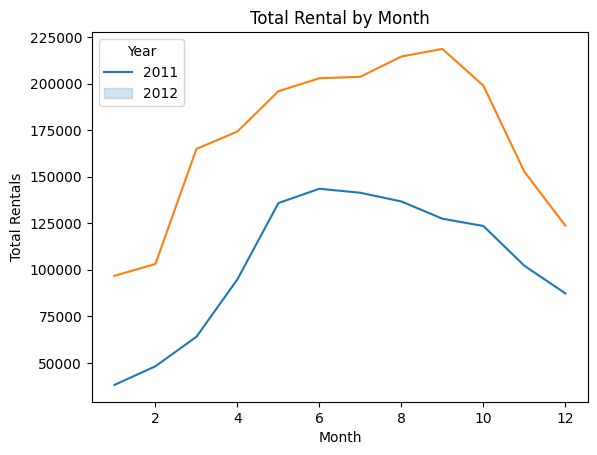

In [ ]:
data_bike_rental = sns.lineplot(x = 'mnth', y = 'total_rentals', data = data1_grouped, hue = 'yr')
data_bike_rental.set(xlabel = 'Month', ylabel = 'Total Rentals', title = 'Total Rental by Month')
plt.legend(title = 'Year', loc = 'upper left', labels = ['2011','2012'])


# Daily Show Guests Cleaned

In [ ]:
data_guest = pd.read_csv('daily_show_guests_cleaned.csv')
data_guest.head()

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman
3,1999,film actress,1/14/99,Acting,Gillian Anderson
4,1999,actor,1/18/99,Acting,David Alan Grier


In [ ]:
data_guest.duplicated().sum()

16

In [ ]:
data_guest.drop_duplicates(keep = 'first', inplace = True)
data_guest.duplicated().sum()

0

In [ ]:
print(data_guest.isna().sum())

YEAR                          0
GoogleKnowlege_Occupation    25
Show                          0
Group                        30
Raw_Guest_List                0
dtype: int64


In [ ]:
#Occupation
data_guest['GoogleKnowlege_Occupation'] = data_guest['GoogleKnowlege_Occupation'].fillna('Unknown')

#Group
data_guest['Group'] = data_guest['Group'].fillna('Unknown')

#check null value
data_guest.isna().sum()

YEAR                         0
GoogleKnowlege_Occupation    0
Show                         0
Group                        0
Raw_Guest_List               0
dtype: int64

## Occupation of Guest by Year

In [ ]:
graph1 = data_guest.copy()
g1_gb = graph1.groupby(['YEAR', 'Group'])['Raw_Guest_List'].agg(['count']).reset_index()
g1_gb.head(10)

,YEAR,Group,count
0,1999,Acting,106
1,1999,Comedy,25
2,1999,Media,11
3,1999,Musician,17
4,1999,Politician,2
5,1999,Unknown,3
6,2000,Acting,99
7,2000,Advocacy,1
8,2000,Athletics,3
9,2000,Business,1


In [ ]:
pd.set_option("display.max_rows", None)
g1_gb['Group'].value_counts()

Acting            17
Media             17
Musician          17
Politician        17
Comedy            17
Political Aide    16
Athletics         15
Misc              14
Academic          14
Government        13
Science           13
Business          13
Advocacy          12
Unknown           12
Military          11
Consultant         8
Clergy             7
Name: Group, dtype: int64

In [ ]:
g1_gb['YEAR'] = g1_gb['YEAR'].astype('object')

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

rcParams['figure.figsize'] = 15, 10
rcParams['figure.figsize'] = 15, 10
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

import plotly.express as px
from IPython.display import Image
from plotly.subplots import make_subplots

title = '''
Actor/Actress was the Most Popular Guest in Early Days
'''

fig = px.line(g1_gb, x="YEAR", y="count", color="Group",
              title = title,
              labels= {"YEAR":"Year",
                       "count":"Count",
                       "Group":"Occupation"},)

fig.update_layout(yaxis_title=" ")

fig.update_layout(
 autosize=False,
 width=700,
 height=450,
 yaxis_range=[5,110]
 )

fig.add_annotation(
 x='2002',
 y=89,
 xref="x",
 yref="y",
 text="Acting",
 showarrow=True,
 font=dict(
 family="Arial",
 size=16,
 color="#ffffff"
 ),
 align="center",
 arrowhead=2,
 arrowsize=1,
 arrowwidth=2,
 arrowcolor="#636363",
 ax=20,
 ay=-30,
 bordercolor="#c7c7c7",
 borderwidth=2,
 borderpad=4,
 bgcolor="#4169E1",
 opacity=0.8
 )

fig.add_annotation(
 x='2008',
 y=79,
 xref="x",
 yref="y",
 text="Media",
 showarrow=True,
 font=dict(
 family="Arial",
 size=16,
 color="#ffffff"
 ),
 align="center",
 arrowhead=2,
 arrowsize=1,
 arrowwidth=2,
 arrowcolor="#636363",
 ax=20,
 ay=-30,
 bordercolor="#c7c7c7",
 borderwidth=2,
 borderpad=4,
 bgcolor="#3CB371",
 opacity=0.8
 )

fig.add_annotation(
 x='2013',
 y=15,
 xref="x",
 yref="y",
 text="Politician",
 showarrow=True,
 font=dict(
 family="Arial",
 size=16,
 color="#ffffff"
 ),
 align="center",
 arrowhead=2,
 arrowsize=1,
 arrowwidth=2,
 arrowcolor="#636363",
 ax=20,
 ay=-30,
 bordercolor="#c7c7c7",
 borderwidth=2,
 borderpad=4,
 bgcolor="#FFA500",
 opacity=0.8
 )
fig.show()

# US Counties

In [ ]:
data_us = pd.read_csv('us-counties.csv',encoding='cp1252')
data_us.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1.0,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1.0,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1.0,0.0
3,2020-01-24,Cook,Illinois,17031.0,1.0,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1.0,0.0


In [ ]:
dr = data_us.groupby(['state']).sum().reset_index()[['state','cases','deaths']]
dr = dr.sort_values(by='state')
dr

,state,cases,deaths
0,Alabama,36710.0,861.0
1,Alaska,3549.0,62.0
2,Arizona,40468.0,1101.0
3,Arkansas,16938.0,279.0
4,California,282898.0,7042.0
5,Colorado,90238.0,2769.0
6,Connecticut,118569.0,4262.0
7,Delaware,14591.0,310.0
8,District of Columbia,19358.0,416.0
9,Florida,225178.0,4377.0


In [ ]:
dr['death_rate'] = dr.deaths / dr.cases
dr


,state,cases,deaths,death_rate
0,Alabama,36710.0,861.0,0.023454
1,Alaska,3549.0,62.0,0.017470
2,Arizona,40468.0,1101.0,0.027207
3,Arkansas,16938.0,279.0,0.016472
4,California,282898.0,7042.0,0.024892
5,Colorado,90238.0,2769.0,0.030686
6,Connecticut,118569.0,4262.0,0.035945
7,Delaware,14591.0,310.0,0.021246
8,District of Columbia,19358.0,416.0,0.021490
9,Florida,225178.0,4377.0,0.019438


In [ ]:
title = '''
Death Rate by States (2020-2022)
'''
fig = px.bar(dr, x="state", y='death_rate', title = title,

 )
fig.update_layout(yaxis_title="Death Rate")
fig.update_layout(
 autosize=False,
 width=700,
 height=750,
 )
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [ ]:
title = '''
Cases by States (2020-2022)
'''
fig = px.bar(dr, x="state", y='cases', title = title,

 )
fig.update_layout(yaxis_title="Total Cases")
fig.update_layout(
 autosize=False,
 width=700,
 height=750,
 )
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [ ]:
title = '''
Deaths by States (2020-2022)
'''
fig = px.bar(dr, x="state", y='deaths', title = title,

 )
fig.update_layout(yaxis_title="Number of Deaths")
fig.update_layout(
 autosize=False,
 width=700,
 height=750,
 )
fig.update_xaxes(categoryorder='total descending')
fig.show()

# Insurance Premium

In [ ]:
data_insurance = pd.read_csv('insurance_premiums.csv')
data_insurance.head()

,State,fatal_collisions,fatal_collisions_speeding,fatal_collisions_alc,fatal_collisions_not_distracted,fatal_collisions_no_hist,premiums,insurance_losses,Region
0,Alabama,18.8,39,30,96,80,784.55,145.08,South
1,Alaska,18.1,41,25,90,94,1053.48,133.93,West
2,Arizona,18.6,35,28,84,96,899.47,110.35,West
3,Arkansas,22.4,18,26,94,95,827.34,142.39,South
4,California,12.0,35,28,91,89,878.41,165.63,West


In [ ]:
data_insurance.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            51 non-null     object 
 1   fatal_collisions                 51 non-null     float64
 2   fatal_collisions_speeding        51 non-null     int64  
 3   fatal_collisions_alc             51 non-null     int64  
 4   fatal_collisions_not_distracted  51 non-null     int64  
 5   fatal_collisions_no_hist         51 non-null     int64  
 6   premiums                         51 non-null     float64
 7   insurance_losses                 51 non-null     float64
 8   Region                           51 non-null     object 
dtypes: float64(3), int64(4), object(2)
memory usage: 3.7+ KB


In [ ]:
title = '''
Insurance Premiums
'''
fig = px.bar(data_insurance, x="State", y=['premiums','insurance_losses'],
title = title, barmode = 'group',)
fig.update_layout(yaxis_title="Total Premiums")
fig.update_layout(
 autosize=False,
 width=700,
 height=750,
 )
fig.update_xaxes(categoryorder='total descending')
fig.show()
